## Homework 5 Starting Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as R

# supress unnecessary warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [2]:
## generate N random samples from a 2D multivariate normal distribution
##
## with mean [mx, my]
##
## with covariance matrix [[  sx*sx, r*sx*sy],
##                         [r*sx*sy,   sy*sy]]
## where sx is the standard deviation along the x dimension
## where sy is the standard deviation along the y dimension
## where r is the correlation between the dimensions
##

def gensamples(N, mx, my, sx, sy, r):
    M   = np.array([mx, my])
    Cov = np.array([[  sx*sx, r*sx*sy],
                    [r*sx*sy,   sy*sy]])
    return (R.multivariate_normal(M, Cov, size=N, check_valid='warn'))

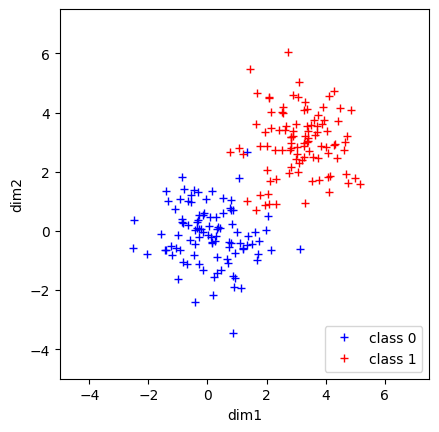

In [3]:
# classification problem used in Q1

mx0 = 0.;  my0 = 0.
sx0 = 1.;  sy0 = 1.
r0 = 0.

mx1 = 3.; my1 = 3.
sx1 = 1.; sy1 = 1.
r1 = 0.

N = 100

sample0 = gensamples(N, mx0, my0, sx0, sy0, r0)

sample1 = gensamples(N, mx1, my1, sx1, sy1, r1)

# plot example
plt.plot(sample0[:,0],sample0[:,1],'b+',sample1[:,0],sample1[:,1],'r+')
plt.xlabel('dim1')
plt.ylabel('dim2')
plt.axis('equal')
plt.axis('square')
plt.legend(('class 0', 'class 1'), loc='lower right')
xymin = -5; xymax = 7.5
plt.ylim((xymin,xymax))
plt.xlim((xymin,xymax))
plt.show()

<hr>

<b>Q1 (10 point). Train a Keras network to do a simple classification. </b> Write Keras code to learn this classification problem. Your neural network will have an input layer containing two units (for the x and y dimension) and an output layer with one unit. See HW5 PDF for important instructions.

In [4]:
# Importing dependencies
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [5]:
# Concatenating training patterns (points drawn from class0 on top)
train_pats = np.concatenate((sample0, sample1), axis=0)
teach_pats = np.concatenate((np.zeros(N), np.ones(N)), axis=0)
print(np.mean(train_pats[0:10]),"\n", np.mean(train_pats[N:N+10]))

# Reshaping so teaching patterns are (2N, 1) arrays intead of 2N
print(f"Training pats:\t\t\t{teach_pats.shape}")
teach_pats =  np.reshape(teach_pats, (2*N, 1))
print(f"Training pats reshaped:\t\t{teach_pats.shape}")

print()
print("########### Shapes of in and out #########")
print(train_pats.shape)
print(teach_pats.shape)


0.05202258307767767 
 3.1526303581437523
Training pats:			(200,)
Training pats reshaped:		(200, 1)

########### Shapes of in and out #########
(200, 2)
(200, 1)


In [6]:
# Building network
network = models.Sequential()
nin = 2
nout = 1
network.add(
    layers.Dense(
        nout,
        activation='sigmoid',
        input_shape=(nin,)
    )
)

# configure optimizer
sgd = optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9)

# compile network
network.compile(optimizer=sgd, 
                loss='mean_squared_error', 
                metrics=['accuracy', 'mse'])
        

In [7]:
epochs = 35
# Training network
history = network.fit(train_pats, 
                      teach_pats, 
                      verbose=True, 
                      validation_split=.1, 
                      epochs=epochs, 
                      batch_size=20)



Epoch 1/35
9/9 [==============================] - 1s 26ms/step - loss: 0.2706 - accuracy: 0.6056 - mse: 0.2706 - val_loss: 0.0987 - val_accuracy: 0.9000 - val_mse: 0.0987
Epoch 2/35
9/9 [==============================] - 0s 5ms/step - loss: 0.2352 - accuracy: 0.6667 - mse: 0.2352 - val_loss: 0.0452 - val_accuracy: 1.0000 - val_mse: 0.0452
Epoch 3/35
9/9 [==============================] - 0s 6ms/step - loss: 0.2060 - accuracy: 0.6944 - mse: 0.2060 - val_loss: 0.0198 - val_accuracy: 1.0000 - val_mse: 0.0198
Epoch 4/35
9/9 [==============================] - 0s 6ms/step - loss: 0.1864 - accuracy: 0.7056 - mse: 0.1864 - val_loss: 0.0113 - val_accuracy: 1.0000 - val_mse: 0.0113
Epoch 5/35
9/9 [==============================] - 0s 8ms/step - loss: 0.1737 - accuracy: 0.7222 - mse: 0.1737 - val_loss: 0.0075 - val_accuracy: 1.0000 - val_mse: 0.0075
Epoch 6/35
9/9 [==============================] - 0s 6ms/step - loss: 0.1612 - accuracy: 0.7500 - mse: 0.1612 - val_loss: 0.0063 - val_accuracy: 1.00

In [8]:
print(f"JUSTIFICATION: Change in delta_accuracy is generally less than .5% after epoch > {epochs}.")
print("See Q2 for visualization")

JUSTIFICATION: Change in delta_accuracy is generally less than .5% after epoch > 35.
See Q2 for visualization


<hr>

<b>Q2 (2 points). Visualize the performance of the network over the course of training.</b> Create a plot of training accuracy as a function of epoch (with axes properly labeled).

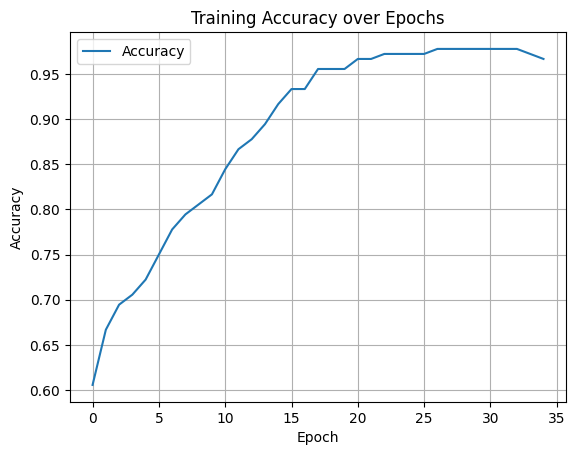

In [9]:
# Visualizing training accuracy over epoch
import matplotlib.pyplot as plt

history.history.keys()
accuracy = history.history['accuracy']

plt.plot(accuracy)
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Accuracy"])
plt.title("Training Accuracy over Epochs");

<hr>

<b>Q3 (3 points). Exploration of different training protocols.</b> Explore what happens when you (a) set the batch size equal to 1 (so that weights get updated after every training pattern), and (b) set the batch size equal to the total number of training patterns (so that weights get updated once per epoch after all of the training patterns have been shown). Use the same number of total epochs you found in Q1.

In [10]:
# (A) batch size of 1
batch_size_a = 1

network_a = models.Sequential()
network_a.add(
    layers.Dense(
        nout,
        activation='sigmoid',
        input_shape=(nin,)
    )
)

# compile network
network_a.compile(optimizer=sgd, 
                loss='mean_squared_error', 
                metrics=['accuracy', 'mse'])

# Training network
history_a = network_a.fit(train_pats, 
                      teach_pats, 
                      verbose=True, 
                      validation_split=.1, 
                      epochs=epochs, 
                      batch_size=batch_size_a)

# Getting accuracy
accuracy_a = history_a.history['accuracy']


Epoch 1/35
180/180 [==============================] - 1s 2ms/step - loss: 0.1339 - accuracy: 0.8333 - mse: 0.1339 - val_loss: 0.0124 - val_accuracy: 1.0000 - val_mse: 0.0124
Epoch 2/35
180/180 [==============================] - 0s 2ms/step - loss: 0.0469 - accuracy: 0.9778 - mse: 0.0469 - val_loss: 0.0060 - val_accuracy: 1.0000 - val_mse: 0.0060
Epoch 3/35
180/180 [==============================] - 0s 2ms/step - loss: 0.0366 - accuracy: 0.9722 - mse: 0.0366 - val_loss: 0.0048 - val_accuracy: 1.0000 - val_mse: 0.0048
Epoch 4/35
180/180 [==============================] - 0s 2ms/step - loss: 0.0318 - accuracy: 0.9722 - mse: 0.0318 - val_loss: 0.0053 - val_accuracy: 1.0000 - val_mse: 0.0053
Epoch 5/35
180/180 [==============================] - 0s 2ms/step - loss: 0.0292 - accuracy: 0.9667 - mse: 0.0292 - val_loss: 0.0061 - val_accuracy: 1.0000 - val_mse: 0.0061
Epoch 6/35
180/180 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 0.9778 - mse: 0.0274 - val_loss: 0.00

In [11]:
# (B) batch size of 2N
batch_size_b = 2*N

network_b = models.Sequential()
network_b.add(
    layers.Dense(
        nout,
        activation='sigmoid',
        input_shape=(nin,)
    )
)

# compile network
network_b.compile(optimizer=sgd, 
                loss='mean_squared_error', 
                metrics=['accuracy', 'mse'])

# Training network
history_b = network_b.fit(train_pats, 
                      teach_pats, 
                      verbose=True, 
                      validation_split=.1, 
                      epochs=epochs, 
                      batch_size=batch_size_b)

# Getting accuracy
accuracy_b = history_b.history['accuracy']


Epoch 1/35
1/1 [==============================] - 0s 341ms/step - loss: 0.1501 - accuracy: 0.7222 - mse: 0.1501 - val_loss: 0.0132 - val_accuracy: 1.0000 - val_mse: 0.0132
Epoch 2/35
1/1 [==============================] - 0s 25ms/step - loss: 0.1499 - accuracy: 0.7222 - mse: 0.1499 - val_loss: 0.0132 - val_accuracy: 1.0000 - val_mse: 0.0132
Epoch 3/35
1/1 [==============================] - 0s 25ms/step - loss: 0.1496 - accuracy: 0.7222 - mse: 0.1496 - val_loss: 0.0133 - val_accuracy: 1.0000 - val_mse: 0.0133
Epoch 4/35
1/1 [==============================] - 0s 27ms/step - loss: 0.1493 - accuracy: 0.7222 - mse: 0.1493 - val_loss: 0.0133 - val_accuracy: 1.0000 - val_mse: 0.0133
Epoch 5/35
1/1 [==============================] - 0s 30ms/step - loss: 0.1488 - accuracy: 0.7278 - mse: 0.1488 - val_loss: 0.0133 - val_accuracy: 1.0000 - val_mse: 0.0133
Epoch 6/35
1/1 [==============================] - 0s 35ms/step - loss: 0.1482 - accuracy: 0.7333 - mse: 0.1482 - val_loss: 0.0133 - val_accuracy

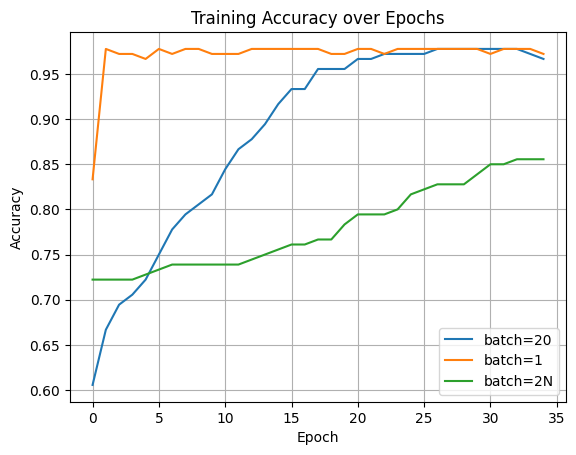

In [12]:
# Plotting accuracies
plt.plot(accuracy, label="batch=20")
plt.plot(accuracy_a, label="batch=1")
plt.plot(accuracy_b, label="batch=2N")
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training Accuracy over Epochs");

Rationale for graph:
* When batch_size = 1, each of the two weights change for *every training pattern*  (200 times per epoch)
* When batch_size = 2N, each weight updates only once *every entire set of training patterns* (1 time per eoch)
* When batch_size = 20, each weight updates 10 times per epoch

Therefore this simple neural network, we should expect the accuracy of `network_a` on *epoch 1* to be about same as `network`'s accuracy on *epoch 20* and `network_b`'s accuracy on `epoch_200` (provided network_b does not get stuck in local minima).

 We can test this hypothesis below:

In [13]:
# Training network
history_b = network_b.fit(train_pats, 
                      teach_pats, 
                      verbose=True, 
                      validation_split=.1, 
                      epochs=200 - epochs, 
                      batch_size=batch_size_b)
a_1 = history.history['accuracy'][20]
n_20 = history_a.history['accuracy'][1]
b_200 = history_b.history['accuracy'][-1]

Epoch 1/165
1/1 [==============================] - 0s 59ms/step - loss: 0.1176 - accuracy: 0.8611 - mse: 0.1176 - val_loss: 0.0149 - val_accuracy: 1.0000 - val_mse: 0.0149
Epoch 2/165
1/1 [==============================] - 0s 24ms/step - loss: 0.1166 - accuracy: 0.8667 - mse: 0.1166 - val_loss: 0.0149 - val_accuracy: 1.0000 - val_mse: 0.0149
Epoch 3/165
1/1 [==============================] - 0s 34ms/step - loss: 0.1157 - accuracy: 0.8667 - mse: 0.1157 - val_loss: 0.0150 - val_accuracy: 1.0000 - val_mse: 0.0150
Epoch 4/165
1/1 [==============================] - 0s 42ms/step - loss: 0.1147 - accuracy: 0.8722 - mse: 0.1147 - val_loss: 0.0150 - val_accuracy: 1.0000 - val_mse: 0.0150
Epoch 5/165
1/1 [==============================] - 0s 34ms/step - loss: 0.1137 - accuracy: 0.8722 - mse: 0.1137 - val_loss: 0.0151 - val_accuracy: 1.0000 - val_mse: 0.0151
Epoch 6/165
1/1 [==============================] - 0s 25ms/step - loss: 0.1128 - accuracy: 0.8722 - mse: 0.1128 - val_loss: 0.0151 - val_acc

In [14]:
print(f"""
Network A (epoch 1): {a_1}
Network N (epoch 20): {n_20}
Network B (epoch 200): {b_200}
""")



Network A (epoch 1): 0.9666666388511658
Network N (epoch 20): 0.9777777791023254
Network B (epoch 200): 0.9833333492279053



<hr>

<b>Q4 (4 points). Visualize the classification decision performance.</b> Homework5.ipynb provides code that generates an array of test patterns and provides a plottest() function that displays a shaded contour plot of network predictions on these test patterns (as discussed in class). Present these test patterns to the trained network from Q1 and plot the results using the plottest() function. 

In [15]:
# this code will generate an array of test patterns for Q4
# they will be evenly spaced along the x and y axes, making a lattice, or mesh 

xymin = -5
xymax = 7.5
Npts = 50
xv, yv = np.meshgrid(np.linspace(xymin, xymax, Npts), 
                     np.linspace(xymin, xymax, Npts))
test_pats = np.concatenate((xv.reshape((Npts*Npts,1)), 
                            yv.reshape((Npts*Npts,1))), axis=1)

In [16]:
# Use this function to create a plot for Q4
# xv is array of x-values of test grid (from meshgrid above)
# yv is array of y-values of test grid (from meshgrid above)
# out is the output of the neural network given the test patterns
# sample0, sample1 are the training patterns from earlier

def plottest(xv, yv, out, sample0, sample1):
    # reshape out
    zv = out.reshape(xv.shape)

    # create figure
    fig = plt.figure()
    plt.contourf(xv, yv, zv, levels=xv.shape[0], cmap=plt.cm.gist_yarg)
    plt.plot(sample0[:,0], sample0[:,1], 'b+', 
             sample1[:,0], sample1[:,1], 'r+')    
    
    plt.xlabel('dim1')
    plt.ylabel('dim2')
    plt.axis('equal')
    plt.axis('square')
    xymin = -5; xymax = 7.5
    plt.ylim((xymin,xymax))
    plt.xlim((xymin,xymax))
    plt.show()



79/79 [==============================] - 0s 1ms/step


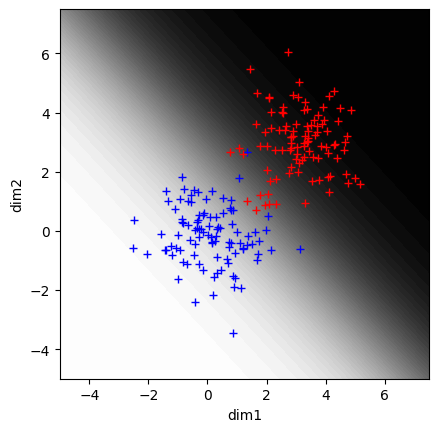

In [17]:
# Creating cool activation visualizaiton
out = network.predict(test_pats)
plottest(xv, yv, out, sample0, sample1)
